## FASHION MNIST - AUTOENCODER

In [1]:
import mnist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
import mnist
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import random


## Loading the data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('C:/Unsupervised/Datasets/fashionmnist')

# Loading Train data
X_train = data.train.images
Y_train = data.train.labels
# Loading Test Data
X_test = data.test.images
Y_test= data.test.labels

Y_train = np.eye(10)[data.train.labels]
Y_test = np.eye(10)[data.test.labels]

X_train.shape, Y_train.shape, X_test.shape,Y_test.shape

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting C:/Unsupervised/Datasets/fashionmnist\train-images-idx3-ubyte.gz
Extracting C:/Unsupervised/Datasets/fashionmnist\train-labels-idx1-ubyte.gz
Extracting C:/Unsupervised/Datasets/fashionmnist\t10k-images-idx3-ubyte.gz
Extracting C:/Unsupervised/Datasets/fashionmnist\t10k-labels-idx1-ubyte.gz


((55000, 784), (55000, 10), (10000, 784), (10000, 10))

##  Classification Task - building the Decision Tree Model

In [3]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)
#Accuracy on test data
print("Train Accuracy using Decision Trees:",clf.score(X_train,Y_train))
#Accuracy on test data
print("Test Accuracy using Decision Trees:",clf.score(X_test,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.7915


#### Network Parameters
#### K = 20



In [4]:
inputs = 784
hidden_layer1_units = 20
output_layer_units = inputs


In [5]:
hidden_layer1_units

20

#### Placeholder to pass data to the feed below.
#### Input Tensor



In [6]:

X = tf.placeholder(tf.float32, shape = [None, inputs])#flattened shape

### Storing the Weights & Biases
##### Each node is multiplied by a weight. Every node has a weight value, and during the training phase the neural network adjusts these values in order to produce a correct output.

#### In addition to multiplying each input node by a weight, the network also adds a bias.

#### After multiplying the inputs by weights and sum the values to the bias,the data passes an activation function, in our case the sigmoid function.

In [7]:
tf.set_random_seed(42)
W = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units, output_layer_units]))
}

B = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer_units]))
}

# encoder
encoder = tf.matmul(X,W['encoder_h1']) +  B['encoder_h1']
encoder = tf.sigmoid(encoder) 

#decoder
decoder = tf.matmul(encoder,W['decoder_h1'])  + B['decoder_h1']
decoder = tf.sigmoid(decoder) # using sigmoid activation

#### Setting parameters:
#### epoch - one forward pass (getting the output values)  and one backward pass (updating the weights) of all the training examples
#### learning rate - determines the incremental steps of values to find the best weight values.

In [8]:
epochs = 10
batch_size = 256
learning_rate = 0.01 

#### Loss function : - Comparing the output values with the input values. Computing the loss, by calculating the mean error between reconstructed X and original inputs.
#### Optimizer : - To find the best values for the weights and biases in order to minimize the output error, We will use gradient descent, specifically Adaptive Moment Estimation(Adam). The AdamOptimizer method computes gradients (loss) and updates the tf.Variables with the new values.

In [9]:
Y = X
loss = tf.reduce_mean(tf.pow(decoder - Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

### Evaluation:

In [10]:
def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind])

##### Launch the graph


In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        train_c = 0                                                       
        total_batch = int(X_train.shape[0]/batch_size)  
        # Loop over all batches        
        for i in range(total_batch):
            batch_x = get_batches(batch_size, X_train)
            # pass optimization step and loss calculation
            # feed_dict parameter is where we pass the data for each run step.
            _,train_c = sess.run([optimizer, loss], feed_dict = {X: batch_x})
            train_c += train_c/batch_size    
        #if epoch % 5 == 0:
        print("\n Epoch:",epoch+1,"\t Average Training Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X:X_test})
        print("\n Test Error", test_c)    
    encoder_train, decoder_train = sess.run([encoder,decoder],feed_dict = {X:X_train})
    encoder_test, decoder_test = sess.run([encoder,decoder],feed_dict = {X:X_test}) 


 Epoch: 1 	 Average Training Error: 0.05286894888558891

 Test Error 0.052634463

 Epoch: 2 	 Average Training Error: 0.043013297821744345

 Test Error 0.04217913

 Epoch: 3 	 Average Training Error: 0.03903740050736815

 Test Error 0.038520794

 Epoch: 4 	 Average Training Error: 0.035330532482475974

 Test Error 0.036298685

 Epoch: 5 	 Average Training Error: 0.03360310310381465

 Test Error 0.034827292

 Epoch: 6 	 Average Training Error: 0.03247619514877442

 Test Error 0.033737622

 Epoch: 7 	 Average Training Error: 0.03455636644503102

 Test Error 0.03303841

 Epoch: 8 	 Average Training Error: 0.030569969523639884

 Test Error 0.032309942

 Epoch: 9 	 Average Training Error: 0.02993757155491039

 Test Error 0.031255454

 Epoch: 10 	 Average Training Error: 0.02952155337698059

 Test Error 0.030435164


In [12]:
# Hidden Layer 
encoder_train.shape, encoder_test.shape

((55000, 20), (10000, 20))

In [13]:
# Reconstructed Inputs
decoder_train.shape, decoder_test.shape

((55000, 784), (10000, 784))

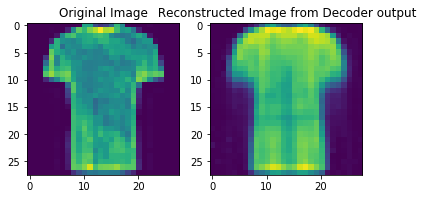

In [14]:
# reconstructing the image from the decoded train data.
i = 45
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_train[i].reshape(28,28)
plt.imshow(img)

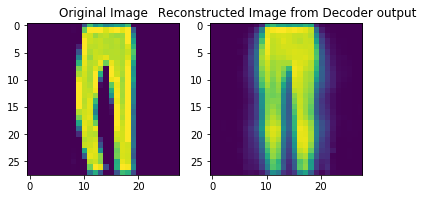

In [15]:
# reconstructing the image from the decoded test data.
i = 2
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_test[i].reshape(28,28)
plt.imshow(img)

#### We can next use the K =20 (reduced dimensions) from the encoder, to build a classifier

In [16]:
#Building the Decision Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(encoder_train,Y_train)

#Accuracy on Train data
print("Train Accuracy using Decision Trees:",clf.score(encoder_train,Y_train))

#Accuracy on Test data
print("Test Accuracy using Decision Trees:",clf.score(encoder_test,Y_test))


Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.6988


## Now, we repeat the above exercise for K = 5

In [17]:
inputs = 784
hidden_layer1_units = 5
output_layer_units = inputs
epochs = 10
batch_size = 256
learning_rate = 0.01

X_5 = tf.placeholder(tf.float32, shape=[None, inputs])

tf.set_random_seed(42)
W_5 = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer1_units])),
    'decoder_h1': tf.Variable(tf.random_normal([hidden_layer1_units, output_layer_units]))
}

B_5 = {
    'encoder_h1': tf.Variable(tf.random_normal([hidden_layer1_units])),
    'decoder_h1': tf.Variable(tf.random_normal([output_layer_units]))
}

encoder_5 = tf.matmul(X_5, W_5['encoder_h1']) + B_5['encoder_h1']
encoder_5 = tf.sigmoid(encoder_5)
decoder_5 = tf.matmul(encoder_5, W_5['decoder_h1']) + B_5['decoder_h1']
decoder_5 = tf.sigmoid(decoder_5)

Y_5 = X_5
loss = tf.reduce_mean(tf.pow(decoder_5 - Y_5, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


def get_batches(batch_size, x):
    indexes = list(range(x.shape[0]))
    random.shuffle(indexes)
    ind = indexes[:batch_size]
    return (x[ind])


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        train_c = 0
        total_batch = int(X_train.shape[0] / batch_size)
        for i in range(total_batch):
            batch_x = get_batches(batch_size, X_train)
            _, train_c = sess.run([optimizer, loss], feed_dict={X_5: batch_x})
            train_c += train_c / batch_size
        # if epoch % 5 == 0:
        print("\n Epoch:", epoch + 1, "\t Average Training Error:", train_c)
        test_c = sess.run(loss, feed_dict={X_5: X_test})
        print("\n Test Error", test_c)
    encoder_train_5, decoder_train_5 = sess.run([encoder_5, decoder_5], feed_dict={X_5: X_train})
    encoder_test_5, decoder_test_5 = sess.run([encoder_5, decoder_5], feed_dict={X_5: X_test}) 



 Epoch: 1 	 Average Training Error: 0.08912430694908835

 Test Error 0.08421893

 Epoch: 2 	 Average Training Error: 0.06583397582289763

 Test Error 0.06431749

 Epoch: 3 	 Average Training Error: 0.05610080459155142

 Test Error 0.05587248

 Epoch: 4 	 Average Training Error: 0.04931621097784955

 Test Error 0.05072635

 Epoch: 5 	 Average Training Error: 0.04950879415264353

 Test Error 0.048774008

 Epoch: 6 	 Average Training Error: 0.04682505720120389

 Test Error 0.04766573

 Epoch: 7 	 Average Training Error: 0.0478960432956228

 Test Error 0.046767145

 Epoch: 8 	 Average Training Error: 0.04697847674833611

 Test Error 0.046339776

 Epoch: 9 	 Average Training Error: 0.04505110792524647

 Test Error 0.045886435

 Epoch: 10 	 Average Training Error: 0.048051444959128276

 Test Error 0.045556325


In [18]:
# Hidden Layer 

encoder_train_5.shape, encoder_test_5.shape

((55000, 5), (10000, 5))

In [19]:
# Reconstructed Inputs 

decoder_train_5.shape, decoder_test_5.shape

((55000, 784), (10000, 784))

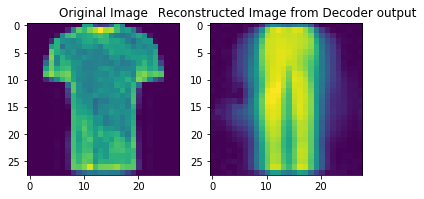

In [20]:
# reconstructing the image from the decoded train data.
i = 45
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_train_5[i].reshape(28,28)
plt.imshow(img)

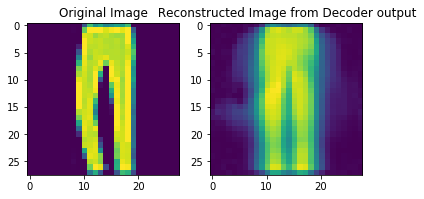

In [21]:
# reconstructing the image from the decoded test data.
i = 2
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_test_5[i].reshape(28,28)
plt.imshow(img)

In [22]:
clf = tree.DecisionTreeClassifier()
clf.fit(encoder_train_5,Y_train)

#Accuracy on Train data
print("Train Accuracy using Decision Trees:",clf.score(encoder_train_5,Y_train))

#Accuracy on Test data
print("Test Accuracy using Decision Trees:",clf.score(encoder_test_5,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.4843


## Now, we repeat the above exercise for K = 10

In [23]:
inputs = 784
hidden_layer1_units = 10
output_layer_units = inputs
epochs = 10
batch_size = 256
learning_rate = 0.01

X_10 = tf.placeholder(tf.float32, shape=[None, inputs])

tf.set_random_seed(42)
W_10 = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer1_units])),
    'decoder_h1': tf.Variable(tf.random_normal([hidden_layer1_units, output_layer_units]))
}

B_10 = {
    'encoder_h1': tf.Variable(tf.random_normal([hidden_layer1_units])),
    'decoder_h1': tf.Variable(tf.random_normal([output_layer_units]))
}

encoder_10 = tf.matmul(X_10, W_10['encoder_h1']) + B_10['encoder_h1']
encoder_10 = tf.sigmoid(encoder_10)
decoder_10 = tf.matmul(encoder_10, W_10['decoder_h1']) + B_10['decoder_h1']
decoder_10 = tf.sigmoid(decoder_10)

Y_10 = X_10
loss = tf.reduce_mean(tf.pow(decoder_10 - Y_10, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


def get_batches(batch_size, x):
    indexes = list(range(x.shape[0]))
    random.shuffle(indexes)
    ind = indexes[:batch_size]
    return (x[ind])


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        train_c = 0
        total_batch = int(X_train.shape[0] / batch_size)
        for i in range(total_batch):
            batch_x = get_batches(batch_size, X_train)
            _, train_c = sess.run([optimizer, loss], feed_dict={X_10: batch_x})
            train_c += train_c / batch_size
        # if epoch % 5 == 0:
        print("\n Epoch:", epoch + 1, "\t Average Training Error:", train_c)
        test_c = sess.run(loss, feed_dict={X_10: X_test})
        print("\n Test Error", test_c)
    encoder_train_10, decoder_train_10 = sess.run([encoder_10, decoder_10], feed_dict={X_10: X_train})
    encoder_test_10, decoder_test_10 = sess.run([encoder_10, decoder_10], feed_dict={X_10: X_test})



 Epoch: 1 	 Average Training Error: 0.0678900737548247

 Test Error 0.067908876

 Epoch: 2 	 Average Training Error: 0.051538922620238736

 Test Error 0.052919034

 Epoch: 3 	 Average Training Error: 0.045722065537120216

 Test Error 0.047228925

 Epoch: 4 	 Average Training Error: 0.04331662146432791

 Test Error 0.045418754

 Epoch: 5 	 Average Training Error: 0.04476446023909375

 Test Error 0.0436683

 Epoch: 6 	 Average Training Error: 0.04237671309965663

 Test Error 0.042606354

 Epoch: 7 	 Average Training Error: 0.04198168852599338

 Test Error 0.04183152

 Epoch: 8 	 Average Training Error: 0.04293537820922211

 Test Error 0.04086254

 Epoch: 9 	 Average Training Error: 0.038456236507045105

 Test Error 0.039057318

 Epoch: 10 	 Average Training Error: 0.03922496107406914

 Test Error 0.03742014


In [24]:
# Hidden Layer  

encoder_train_10.shape, encoder_test_10.shape

((55000, 10), (10000, 10))

In [25]:
# Reconstructed Inputs
decoder_train_10.shape, decoder_test_10.shape

((55000, 784), (10000, 784))

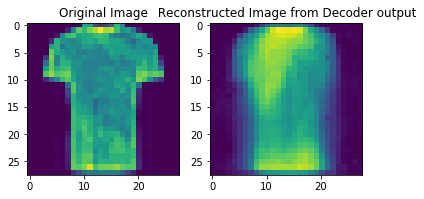

In [26]:
# reconstructing the image from the decoded train data.
i = 45
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_train_10[i].reshape(28,28)
plt.imshow(img)

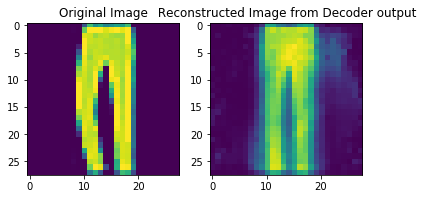

In [27]:
# reconstructing the image from the decoded test data.
i = 2
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_test_10[i].reshape(28,28)
plt.imshow(img)

In [28]:
clf = tree.DecisionTreeClassifier()
clf.fit(encoder_train_10,Y_train)

#Accuracy on Train data
print("Train Accuracy using Decision Trees:",clf.score(encoder_train_10,Y_train))

#Accuracy on Test data
print("Test Accuracy using Decision Trees:",clf.score(encoder_test_10,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.6209


## Now, we repeat the above exercise for K = 100

In [29]:
inputs = 784
hidden_layer1_units = 100
output_layer_units = inputs
epochs = 10
batch_size = 256
learning_rate = 0.01

X_100 = tf.placeholder(tf.float32, shape = [None, inputs]) 

tf.set_random_seed(42)
W_100 = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units, output_layer_units]))
}

B_100 = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer_units]))
}

encoder_100 = tf.matmul(X_100,W_100['encoder_h1']) +  B_100['encoder_h1']
encoder_100 = tf.sigmoid(encoder_100) 
decoder_100 = tf.matmul(encoder_100,W_100['decoder_h1'])  + B_100['decoder_h1']
decoder_100 = tf.sigmoid(decoder_100)


Y_100 = X_100
loss = tf.reduce_mean(tf.pow(decoder_100 - Y_100, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind])
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        train_c = 0                                                       
        total_batch = int(X_train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x = get_batches(batch_size, X_train)
            _,train_c = sess.run([optimizer, loss], feed_dict = {X_100: batch_x})
            train_c += train_c/batch_size
        #if epoch % 5 == 0:
        print("\n Epoch:",epoch+1,"\t Average Training Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X_100:X_test})
        print("\n Test Error", test_c)    
    encoder_train_100, decoder_train_100 = sess.run([encoder_100,decoder_100],feed_dict = {X_100:X_train})
    encoder_test_100, decoder_test_100 = sess.run([encoder_100,decoder_100],feed_dict = {X_100:X_test}) 



 Epoch: 1 	 Average Training Error: 0.050833240573410876

 Test Error 0.05380938

 Epoch: 2 	 Average Training Error: 0.04165712257963605

 Test Error 0.039833378

 Epoch: 3 	 Average Training Error: 0.03559961412975099

 Test Error 0.033842392

 Epoch: 4 	 Average Training Error: 0.028011079724819865

 Test Error 0.0293479

 Epoch: 5 	 Average Training Error: 0.02693423890741542

 Test Error 0.026655713

 Epoch: 6 	 Average Training Error: 0.024602176148619037

 Test Error 0.025266828

 Epoch: 7 	 Average Training Error: 0.024502887077687774

 Test Error 0.024720853

 Epoch: 8 	 Average Training Error: 0.022161177395901177

 Test Error 0.023184774

 Epoch: 9 	 Average Training Error: 0.02106883306259988

 Test Error 0.022442821

 Epoch: 10 	 Average Training Error: 0.021590748612652533

 Test Error 0.021842819


In [30]:
# Hidden Layer 
encoder_train_100.shape, encoder_test_100.shape

((55000, 100), (10000, 100))

In [31]:
# Reconstructed Inputs
decoder_train_100.shape, decoder_test_100.shape

((55000, 784), (10000, 784))

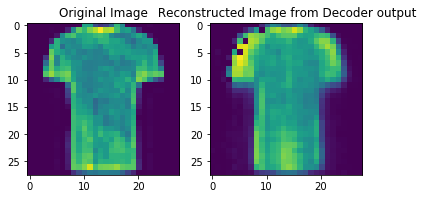

In [32]:
# reconstructing the image from the decoded train data.
i = 45
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_train_100[i].reshape(28,28)
plt.imshow(img)

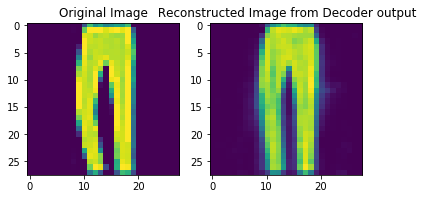

In [33]:
# reconstructing the image from the decoded test data.
i = 2
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_test_100[i].reshape(28,28)
plt.imshow(img)

#### We can next use the K =100 (reduced dimensions) from the encoder, to build a classifier

In [34]:
clf = tree.DecisionTreeClassifier()
clf.fit(encoder_train_100,Y_train)

#Accuracy on Train data
print("Train Accuracy using Decision Trees:",clf.score(encoder_train_100,Y_train))

#Accuracy on Test data
print("Test Accuracy using Decision Trees:",clf.score(encoder_test_100,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.7545


## Now, we repeat the above exercise for K = 200

In [35]:
inputs = 784
hidden_layer1_units = 200
output_layer_units = inputs
epochs = 20
batch_size = 256
learning_rate = 0.01

X_200 = tf.placeholder(tf.float32, shape = [None, inputs]) 

tf.set_random_seed(42)
W_200 = {
    'encoder_h1': tf.Variable(tf.random_normal([inputs, hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units, output_layer_units]))
}

B_200 = {
    'encoder_h1':tf.Variable(tf.random_normal([hidden_layer1_units])),
    'decoder_h1':tf.Variable(tf.random_normal([output_layer_units]))
}

encoder_200 = tf.matmul(X_200,W_200['encoder_h1']) +  B_200['encoder_h1']
encoder_200 = tf.sigmoid(encoder_200) 
decoder_200 = tf.matmul(encoder_200,W_200['decoder_h1'])  + B_200['decoder_h1']
decoder_200 = tf.sigmoid(decoder_200) 


Y_200 = X_200
loss = tf.reduce_mean(tf.pow(decoder_200 - Y_200, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

def get_batches(batch_size,x):
        indexes = list(range(x.shape[0]))
        random.shuffle(indexes)
        ind = indexes[:batch_size]
        return(x[ind])
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        train_c = 0                                                       
        total_batch = int(X_train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x = get_batches(batch_size, X_train)
            _,train_c = sess.run([optimizer, loss], feed_dict = {X_200: batch_x})
            train_c += train_c/batch_size
        #if epoch % 5 == 0:
        print("\n Epoch:",epoch+1,"\t Average Training Error:",train_c)  
        test_c = sess.run(loss,feed_dict = {X_200:X_test})
        print("\n Test Error", test_c)    
    encoder_train_200, decoder_train_200 = sess.run([encoder_200,decoder_200],feed_dict = {X_200:X_train})
    encoder_test_200, decoder_test_200 = sess.run([encoder_200,decoder_200],feed_dict = {X_200:X_test}) 



 Epoch: 1 	 Average Training Error: 0.07428983386489563

 Test Error 0.07180971

 Epoch: 2 	 Average Training Error: 0.0635019822511822

 Test Error 0.061242238

 Epoch: 3 	 Average Training Error: 0.05266075560939498

 Test Error 0.05460628

 Epoch: 4 	 Average Training Error: 0.04862844277522527

 Test Error 0.04988101

 Epoch: 5 	 Average Training Error: 0.04701777875015978

 Test Error 0.047562387

 Epoch: 6 	 Average Training Error: 0.04516350888297893

 Test Error 0.045451958

 Epoch: 7 	 Average Training Error: 0.03902670455863699

 Test Error 0.043929137

 Epoch: 8 	 Average Training Error: 0.041265759311500005

 Test Error 0.041855425

 Epoch: 9 	 Average Training Error: 0.041748778632609174

 Test Error 0.0402145

 Epoch: 10 	 Average Training Error: 0.03573997788771521

 Test Error 0.039035708

 Epoch: 11 	 Average Training Error: 0.0360916876088595

 Test Error 0.037401214

 Epoch: 12 	 Average Training Error: 0.03427004412515089

 Test Error 0.036352064

 Epoch: 13 	 Aver

In [36]:
# Hidden Layer 
encoder_train_200.shape, encoder_test_200.shape

((55000, 200), (10000, 200))

In [37]:
# Reconstructed Inputs
decoder_train_200.shape, decoder_test_200.shape

((55000, 784), (10000, 784))

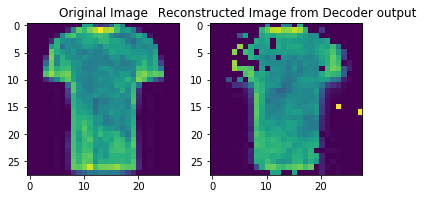

In [38]:
# reconstructing the image from the decoded train data.
i = 45
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_train[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_train_200[i].reshape(28,28)
plt.imshow(img)

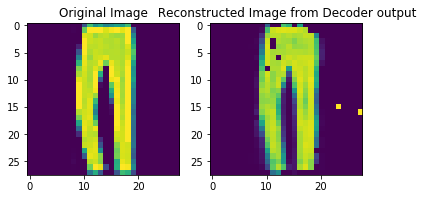

In [39]:
# reconstructing the image from the decoded test data.
i = 2
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X_test[i].reshape(28,28))
plt.subplot(1,2,2)
plt.title(" Reconstructed Image from Decoder output")
img = decoder_test_200[i].reshape(28,28)
plt.imshow(img)

#### We can next use the K = 200 (reduced dimensions) from the encoder, to build a classifier

In [40]:
clf = tree.DecisionTreeClassifier()
clf.fit(encoder_train_200,Y_train)

#Accuracy on Train data
print("Train Accuracy using Decision Trees:",clf.score(encoder_train_200,Y_train))

#Accuracy on Test data
print("Test Accuracy using Decision Trees:",clf.score(encoder_test_200,Y_test))

Train Accuracy using Decision Trees: 1.0
Test Accuracy using Decision Trees: 0.7524
